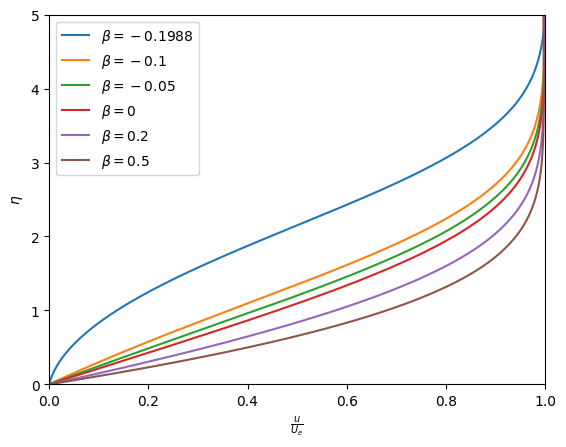

(Text(0.5, 33.42027777777778, '$\\frac{u}{U_e}$'),
 (0.0, 1.0),
 (0.0, 5.0),
 Text(25.000000000000007, 0.5, '$\\eta$'),
 None,
 None)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

beta_list = [-0.1988, -0.1, -0.05, 0, 0.2, 0.5]
eta = np.linspace(0, 5, 5000)

def falkner_skan_differential_equation(eta, f, beta):
    return [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]

for beta in beta_list:
    f_init = [0, 0, 1]
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    while f_prime[-1] > 1:
        f_init[2] += -(f_prime[-1] - 1) / abs(f_prime[-1] - 1) * 0.001
        f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    plt.plot(f_prime[:5001], eta[:5001], label=r"$\beta={}$".format(beta))
plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0,1), plt.ylim(0,5), plt.ylabel('$\eta$'), plt.legend(), plt.savefig('Project 2'), plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

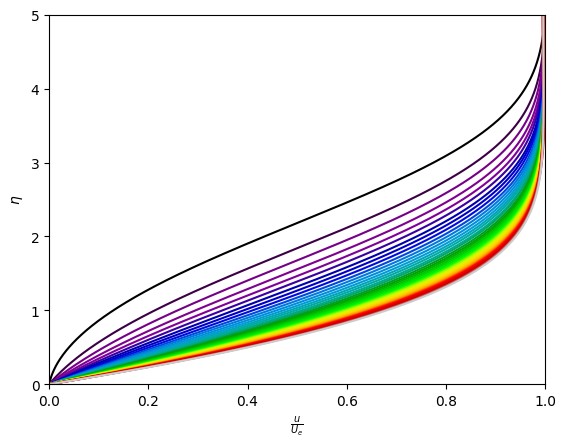

In [4]:
N = 40
min_beta = -0.2
max_beta = 0.5
beta_list = list(np.linspace(min_beta, max_beta, N))
cmap = plt.get_cmap('nipy_spectral', N)

for i, beta in enumerate(beta_list):
    f_init = [0, 0, 1]
    color = cmap(i / 5)
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    while f_prime[-1] > 1:
        f_init[2] += -(f_prime[-1]-1)/abs(f_prime[-1]-1) * 0.001
        f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    plt.plot(f_prime, eta[:5001], c=cmap(i))

plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0, 1), plt.ylim(0, 5), plt.ylabel('$\eta$')

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min_beta,vmax=max_beta)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=np.arange(min_beta, max_beta, 0.05))
cbar.ax.set_title(r"$\beta$"), plt.savefig(r'Continuous beta'), plt.show()
